In [1]:
 !pip -q install folium

In [2]:
import sys
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import folium
import io
from sklearn.cluster import KMeans

print('Libraries Imported')

Libraries Imported


### Scrapping the relevant data from wikipedia

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_districts_of_Tamil_Nadu"
page = requests.get(url)
page

<Response [200]>

In [4]:
soup = BeautifulSoup(page.content,'html.parser')

In [5]:
table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

In [6]:
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns=['No','District', 'Code', 'Headquarters','Established', 'Formed From', 'Area', 'Population','Population Density','Talukas', 'Map'])

In [7]:
df.head(5)


,No,District,Code,Headquarters,Established,Formed From,Area,Population,Population Density,Talukas,Map
0,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None
2,1.,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur,1949.31,"7,54,894",390,Andimadam\nAriyalur\nUdayarpalayam\nSendurai,
3,2.,Chengalpattu,CGL,Chengalpattu,29 November 2019,Kanchipuram,"2,944.96","2,556,244",868,Chengalpattu\nCheyyur\nMadurantakam\nPallavara...,
4,3.,Chennai,CH,Chennai,1 November 1956,One of the original 13 districts (under former...,426,"4,646,732","26,076",Alandur\nAmbattur\nAminjikarai\nAyanavaram\nEg...,


In [8]:
df.shape

(40, 11)

### Begining of Data Cleaning and Formatting 

In [9]:
df.drop(['No'],axis=1,inplace=True)
df.head()

,District,Code,Headquarters,Established,Formed From,Area,Population,Population Density,Talukas,Map
0,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None
2,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur,1949.31,"7,54,894",390,Andimadam\nAriyalur\nUdayarpalayam\nSendurai,
3,Chengalpattu,CGL,Chengalpattu,29 November 2019,Kanchipuram,"2,944.96","2,556,244",868,Chengalpattu\nCheyyur\nMadurantakam\nPallavara...,
4,Chennai,CH,Chennai,1 November 1956,One of the original 13 districts (under former...,426,"4,646,732","26,076",Alandur\nAmbattur\nAminjikarai\nAyanavaram\nEg...,


In [10]:
df.drop(['Map'], axis=1, inplace=True)
df.shape
df

,District,Code,Headquarters,Established,Formed From,Area,Population,Population Density,Talukas
0,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None
2,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur,1949.31,"7,54,894",390,Andimadam\nAriyalur\nUdayarpalayam\nSendurai
3,Chengalpattu,CGL,Chengalpattu,29 November 2019,Kanchipuram,"2,944.96","2,556,244",868,Chengalpattu\nCheyyur\nMadurantakam\nPallavara...
4,Chennai,CH,Chennai,1 November 1956,One of the original 13 districts (under former...,426,"4,646,732","26,076",Alandur\nAmbattur\nAminjikarai\nAyanavaram\nEg...
5,Coimbatore,CO,Coimbatore,1 November 1956,One of the original 13 districts,"4,723[36]","3,458,045",732,Anaimalai\nAnnur\nCoimbatore-North\nCoimbatore...
6,Cuddalore,CU,Cuddalore,30 September 1993,South Arcot District,"3,678","2,605,914",709,Bhuvanagiri\nChidambaram\nCuddalore\nKattumann...
7,Dharmapuri,DH,Dharmapuri,2 October 1965,Salem,"4,497.77","15,06,843",335,Dharmapuri\nPalacode\nPennagaram\nHarur\nPappi...
8,Dindigul,DI,Dindigul,15 September 1985,Madurai,"6,266.64","21,59,775",345,Athoor\nDindigul-West\nDindigul-East\nGujiliam...
9,Erode,ER,Erode,31 August 1979,Coimbatore,"5,722[37]","22,51,744",394,Anthiyur\nBhavani\nErode\nGobichettipalayam\nK...


In [11]:
df.drop(['Code','Headquarters','Established','Formed From'], axis=1,inplace=True)
df.head()

,District,Area,Population,Population Density,Talukas
0,None,None,None,None,None
1,None,None,None,None,None
2,Ariyalur,1949.31,"7,54,894",390,Andimadam\nAriyalur\nUdayarpalayam\nSendurai
3,Chengalpattu,"2,944.96","2,556,244",868,Chengalpattu\nCheyyur\nMadurantakam\nPallavara...
4,Chennai,426,"4,646,732","26,076",Alandur\nAmbattur\nAminjikarai\nAyanavaram\nEg...


In [12]:
df['Talukas']= df['Talukas'].replace('\n',', ', regex=True)
df

,District,Area,Population,Population Density,Talukas
0,None,None,None,None,None
1,None,None,None,None,None
2,Ariyalur,1949.31,"7,54,894",390,"Andimadam, Ariyalur, Udayarpalayam, Sendurai"
3,Chengalpattu,"2,944.96","2,556,244",868,"Chengalpattu, Cheyyur, Madurantakam, Pallavara..."
4,Chennai,426,"4,646,732","26,076","Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg..."
5,Coimbatore,"4,723[36]","3,458,045",732,"Anaimalai, Annur, Coimbatore-North, Coimbatore..."
6,Cuddalore,"3,678","2,605,914",709,"Bhuvanagiri, Chidambaram, Cuddalore, Kattumann..."
7,Dharmapuri,"4,497.77","15,06,843",335,"Dharmapuri, Palacode, Pennagaram, Harur, Pappi..."
8,Dindigul,"6,266.64","21,59,775",345,"Athoor, Dindigul-West, Dindigul-East, Gujiliam..."
9,Erode,"5,722[37]","22,51,744",394,"Anthiyur, Bhavani, Erode, Gobichettipalayam, K..."


In [13]:
df.drop(['Population Density'], axis=1, inplace=True)
df.head()

,District,Area,Population,Talukas
0,None,None,None,None
1,None,None,None,None
2,Ariyalur,1949.31,"7,54,894","Andimadam, Ariyalur, Udayarpalayam, Sendurai"
3,Chengalpattu,"2,944.96","2,556,244","Chengalpattu, Cheyyur, Madurantakam, Pallavara..."
4,Chennai,426,"4,646,732","Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg..."


In [14]:
df.head()

,District,Area,Population,Talukas
0,None,None,None,None
1,None,None,None,None
2,Ariyalur,1949.31,"7,54,894","Andimadam, Ariyalur, Udayarpalayam, Sendurai"
3,Chengalpattu,"2,944.96","2,556,244","Chengalpattu, Cheyyur, Madurantakam, Pallavara..."
4,Chennai,426,"4,646,732","Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg..."


In [15]:
df=df.dropna(thresh=2)

In [16]:
df.head()

,District,Area,Population,Talukas
2,Ariyalur,1949.31,"7,54,894","Andimadam, Ariyalur, Udayarpalayam, Sendurai"
3,Chengalpattu,"2,944.96","2,556,244","Chengalpattu, Cheyyur, Madurantakam, Pallavara..."
4,Chennai,426,"4,646,732","Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg..."
5,Coimbatore,"4,723[36]","3,458,045","Anaimalai, Annur, Coimbatore-North, Coimbatore..."
6,Cuddalore,"3,678","2,605,914","Bhuvanagiri, Chidambaram, Cuddalore, Kattumann..."


### Obtaining the coordinates of Tamil Nadu and subsequently that of its districts

In [17]:
from geopy.geocoders import Nominatim 
address = 'Tamil_Nadu, India'

geolocator = Nominatim(user_agent="Tamil_Nadu_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tamil Nadu are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tamil Nadu are 10.9094334, 78.3665347.


In [18]:
df['Dist_Coord']= df['District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Dist_Coord'].apply(pd.Series)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,District,Area,Population,Talukas,Dist_Coord,Latitude,Longitude
2,Ariyalur,1949.31,"7,54,894","Andimadam, Ariyalur, Udayarpalayam, Sendurai","(11.076035950000001, 79.11745538182738)",11.076036,79.117455
3,Chengalpattu,"2,944.96","2,556,244","Chengalpattu, Cheyyur, Madurantakam, Pallavara...","(12.76657415, 79.99931906821485)",12.766574,79.999319
4,Chennai,426,"4,646,732","Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...","(13.0801721, 80.2838331)",13.080172,80.283833
5,Coimbatore,"4,723[36]","3,458,045","Anaimalai, Annur, Coimbatore-North, Coimbatore...","(11.0018115, 76.9628425)",11.001812,76.962842
6,Cuddalore,"3,678","2,605,914","Bhuvanagiri, Chidambaram, Cuddalore, Kattumann...","(11.74269375, 79.75030644171935)",11.742694,79.750306


In [19]:
df.drop(['Dist_Coord'], axis=1, inplace=True)
df.shape
df.head(5)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,District,Area,Population,Talukas,Latitude,Longitude
2,Ariyalur,1949.31,"7,54,894","Andimadam, Ariyalur, Udayarpalayam, Sendurai",11.076036,79.117455
3,Chengalpattu,"2,944.96","2,556,244","Chengalpattu, Cheyyur, Madurantakam, Pallavara...",12.766574,79.999319
4,Chennai,426,"4,646,732","Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833
5,Coimbatore,"4,723[36]","3,458,045","Anaimalai, Annur, Coimbatore-North, Coimbatore...",11.001812,76.962842
6,Cuddalore,"3,678","2,605,914","Bhuvanagiri, Chidambaram, Cuddalore, Kattumann...",11.742694,79.750306


### Updating incorrect Latitudes and Longitudes

In [20]:
Lat_list = df['Latitude'].tolist()
Long_list = df['Longitude'].tolist()
print ('Old latitude list:', Lat_list)
print ('Old Longitude list:', Long_list)

Old latitude list: [11.076035950000001, 12.76657415, 13.0801721, 11.0018115, 11.74269375, 12.09680475, 10.3303299, 11.369204400000001, 11.79468465, 12.9647163, 8.079252, 10.9301522, 12.5188835, 9.9261153, 11.155182199999999, 10.805627600000001, 11.2191319, 11.4, 11.2287716, 10.5, 9.3895523, 12.9272641, 44.9391565, 9.9650599, 9.09407535, 10.7860267, 9.969664300000002, 8.8052602, 10.804973, 8.8082342, 12.4983561, 10.78322705, 13.1394358, 12.22721295, 10.7745978, 12.7948109, 11.9137874, 9.5208936]
Old Longitude list: [79.11745538182738, 79.99931906821485, 80.2838331, 76.9628425, 79.75030644171935, 78.19304301026716, 78.0673979084697, 77.67662686841793, 79.03882106200822, 79.9839686, 77.5499338, 78.08485454572889, 78.2206536, 78.1140983, 79.62739425974078, 79.824659783024, 78.23739801779963, 76.7, 78.81825554962782, 78.833333, 78.85907071521498, 79.3330076, -123.033121, 78.7204283237222, 77.47583689833286, 79.1381497, 77.47420048524822, 78.1452745, 78.6870296, 77.8114843, 78.5618167, 77.52

In [21]:
replace_latitudes = {44.9391565:11.6643}
replace_longitudes = {-123.033121:78.1460}
latitudes_new = [replace_latitudes.get(l1,l1) for l1 in Lat_list]
longtitudes_new = [replace_longitudes.get(l2,l2) for l2 in Long_list]
print (latitudes_new)
print (longtitudes_new)    

[11.076035950000001, 12.76657415, 13.0801721, 11.0018115, 11.74269375, 12.09680475, 10.3303299, 11.369204400000001, 11.79468465, 12.9647163, 8.079252, 10.9301522, 12.5188835, 9.9261153, 11.155182199999999, 10.805627600000001, 11.2191319, 11.4, 11.2287716, 10.5, 9.3895523, 12.9272641, 11.6643, 9.9650599, 9.09407535, 10.7860267, 9.969664300000002, 8.8052602, 10.804973, 8.8082342, 12.4983561, 10.78322705, 13.1394358, 12.22721295, 10.7745978, 12.7948109, 11.9137874, 9.5208936]
[79.11745538182738, 79.99931906821485, 80.2838331, 76.9628425, 79.75030644171935, 78.19304301026716, 78.0673979084697, 77.67662686841793, 79.03882106200822, 79.9839686, 77.5499338, 78.08485454572889, 78.2206536, 78.1140983, 79.62739425974078, 79.824659783024, 78.23739801779963, 76.7, 78.81825554962782, 78.833333, 78.85907071521498, 79.3330076, 78.146, 78.7204283237222, 77.47583689833286, 79.1381497, 77.47420048524822, 78.1452745, 78.6870296, 77.8114843, 78.5618167, 77.52604780096844, 79.9073038, 79.07015554906167, 79

In [22]:
df = df.drop(['Latitude', 'Longitude'], axis=1)
df.head()

,District,Area,Population,Talukas
2,Ariyalur,1949.31,"7,54,894","Andimadam, Ariyalur, Udayarpalayam, Sendurai"
3,Chengalpattu,"2,944.96","2,556,244","Chengalpattu, Cheyyur, Madurantakam, Pallavara..."
4,Chennai,426,"4,646,732","Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg..."
5,Coimbatore,"4,723[36]","3,458,045","Anaimalai, Annur, Coimbatore-North, Coimbatore..."
6,Cuddalore,"3,678","2,605,914","Bhuvanagiri, Chidambaram, Cuddalore, Kattumann..."


In [23]:
df['Dist_Latitude'] = latitudes_new
df['Dist_Longitude'] = longtitudes_new
df


,District,Area,Population,Talukas,Dist_Latitude,Dist_Longitude
2,Ariyalur,1949.31,"7,54,894","Andimadam, Ariyalur, Udayarpalayam, Sendurai",11.076036,79.117455
3,Chengalpattu,"2,944.96","2,556,244","Chengalpattu, Cheyyur, Madurantakam, Pallavara...",12.766574,79.999319
4,Chennai,426,"4,646,732","Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833
5,Coimbatore,"4,723[36]","3,458,045","Anaimalai, Annur, Coimbatore-North, Coimbatore...",11.001812,76.962842
6,Cuddalore,"3,678","2,605,914","Bhuvanagiri, Chidambaram, Cuddalore, Kattumann...",11.742694,79.750306
7,Dharmapuri,"4,497.77","15,06,843","Dharmapuri, Palacode, Pennagaram, Harur, Pappi...",12.096805,78.193043
8,Dindigul,"6,266.64","21,59,775","Athoor, Dindigul-West, Dindigul-East, Gujiliam...",10.330330,78.067398
9,Erode,"5,722[37]","22,51,744","Anthiyur, Bhavani, Erode, Gobichettipalayam, K...",11.369204,77.676627
10,Kallakurichi,"3,520.37","13,70,281","Kallakkurichi, Thirukoilur, Kalvarayan Hills, ...",11.794685,79.038821
11,Kanchipuram,"1,655.94","11,66,401","Kanchipuram, Sriperumbudur, Uthiramerur, Walaj...",12.964716,79.983969


In [24]:
Area_values = df['Area'].tolist()
print ('Area old List:', Area_values)

Area old List: ['1949.31', '2,944.96', '426', '4,723[36]', '3,678', '4,497.77', '6,266.64', '5,722[37]', '3,520.37', '1,655.94', '1,672', '2,895.57', '5,143', '3,741.73', '1,172', '1,397', '3,363', '2,452.5', '1,752', '4,663', '4,089.57', '2,234.32', '5,205', '4,086', '2916.13', '3,396.57', '3,066', '4,621', '4,407', '3842.37', '1,797.92', '5,186.34', '3424', '6,191', '2,161', '2030.11', '3725.54', '4,288']


In [25]:
replace_area = {'4,723[36]':4723,'5,722[37]':5722}
area_new = [replace_area.get(l1,l1) for l1 in Area_values]
print (area_new)
   

['1949.31', '2,944.96', '426', 4723, '3,678', '4,497.77', '6,266.64', 5722, '3,520.37', '1,655.94', '1,672', '2,895.57', '5,143', '3,741.73', '1,172', '1,397', '3,363', '2,452.5', '1,752', '4,663', '4,089.57', '2,234.32', '5,205', '4,086', '2916.13', '3,396.57', '3,066', '4,621', '4,407', '3842.37', '1,797.92', '5,186.34', '3424', '6,191', '2,161', '2030.11', '3725.54', '4,288']


In [26]:
df = df.drop(['Area'], axis=1)

In [27]:
df['Area_New'] = area_new
df

,District,Population,Talukas,Dist_Latitude,Dist_Longitude,Area_New
2,Ariyalur,"7,54,894","Andimadam, Ariyalur, Udayarpalayam, Sendurai",11.076036,79.117455,1949.31
3,Chengalpattu,"2,556,244","Chengalpattu, Cheyyur, Madurantakam, Pallavara...",12.766574,79.999319,"2,944.96"
4,Chennai,"4,646,732","Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833,426
5,Coimbatore,"3,458,045","Anaimalai, Annur, Coimbatore-North, Coimbatore...",11.001812,76.962842,4723
6,Cuddalore,"2,605,914","Bhuvanagiri, Chidambaram, Cuddalore, Kattumann...",11.742694,79.750306,"3,678"
7,Dharmapuri,"15,06,843","Dharmapuri, Palacode, Pennagaram, Harur, Pappi...",12.096805,78.193043,"4,497.77"
8,Dindigul,"21,59,775","Athoor, Dindigul-West, Dindigul-East, Gujiliam...",10.330330,78.067398,"6,266.64"
9,Erode,"22,51,744","Anthiyur, Bhavani, Erode, Gobichettipalayam, K...",11.369204,77.676627,5722
10,Kallakurichi,"13,70,281","Kallakkurichi, Thirukoilur, Kalvarayan Hills, ...",11.794685,79.038821,"3,520.37"
11,Kanchipuram,"11,66,401","Kanchipuram, Sriperumbudur, Uthiramerur, Walaj...",12.964716,79.983969,"1,655.94"


In [28]:
df['Population']=df['Population'].str.replace(',', '').astype(float)
df.head()

,District,Population,Talukas,Dist_Latitude,Dist_Longitude,Area_New
2,Ariyalur,754894.0,"Andimadam, Ariyalur, Udayarpalayam, Sendurai",11.076036,79.117455,1949.31
3,Chengalpattu,2556244.0,"Chengalpattu, Cheyyur, Madurantakam, Pallavara...",12.766574,79.999319,"2,944.96"
4,Chennai,4646732.0,"Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833,426
5,Coimbatore,3458045.0,"Anaimalai, Annur, Coimbatore-North, Coimbatore...",11.001812,76.962842,4723
6,Cuddalore,2605914.0,"Bhuvanagiri, Chidambaram, Cuddalore, Kattumann...",11.742694,79.750306,"3,678"


In [29]:
df['Area']=df['Area_New'].str.replace(',','').astype(float)
df.head()

,District,Population,Talukas,Dist_Latitude,Dist_Longitude,Area_New,Area
2,Ariyalur,754894.0,"Andimadam, Ariyalur, Udayarpalayam, Sendurai",11.076036,79.117455,1949.31,1949.31
3,Chengalpattu,2556244.0,"Chengalpattu, Cheyyur, Madurantakam, Pallavara...",12.766574,79.999319,"2,944.96",2944.96
4,Chennai,4646732.0,"Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833,426,426.00
5,Coimbatore,3458045.0,"Anaimalai, Annur, Coimbatore-North, Coimbatore...",11.001812,76.962842,4723,NaN
6,Cuddalore,2605914.0,"Bhuvanagiri, Chidambaram, Cuddalore, Kattumann...",11.742694,79.750306,"3,678",3678.00


In [30]:
df = df.drop(['Area_New'], axis=1)
df.head()

,District,Population,Talukas,Dist_Latitude,Dist_Longitude,Area
2,Ariyalur,754894.0,"Andimadam, Ariyalur, Udayarpalayam, Sendurai",11.076036,79.117455,1949.31
3,Chengalpattu,2556244.0,"Chengalpattu, Cheyyur, Madurantakam, Pallavara...",12.766574,79.999319,2944.96
4,Chennai,4646732.0,"Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833,426.00
5,Coimbatore,3458045.0,"Anaimalai, Annur, Coimbatore-North, Coimbatore...",11.001812,76.962842,NaN
6,Cuddalore,2605914.0,"Bhuvanagiri, Chidambaram, Cuddalore, Kattumann...",11.742694,79.750306,3678.00


In [31]:
df.to_csv('TamilNadu_df_Coord.csv')

## Project Phase 2 

#### Using Foursquare API to explore Tamil Nadu for the number of multiplexes in the top 5 most populated districts

In [32]:
TN_df = pd.read_csv('TamilNadu_df_Coord.csv', index_col=[0])
TN_df.head(3)

,District,Population,Talukas,Dist_Latitude,Dist_Longitude,Area
2,Ariyalur,754894.0,"Andimadam, Ariyalur, Udayarpalayam, Sendurai",11.076036,79.117455,1949.31
3,Chengalpattu,2556244.0,"Chengalpattu, Cheyyur, Madurantakam, Pallavara...",12.766574,79.999319,2944.96
4,Chennai,4646732.0,"Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833,426.00


In [33]:
TN_df.sort_values(['Population'], axis = 0, ascending = False, inplace = True, na_position ='last') 
TN_df.head()

,District,Population,Talukas,Dist_Latitude,Dist_Longitude,Area
4,Chennai,4646732.0,"Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833,426.00
34,Tiruvallur,3728104.0,"Avadi, Gummidipoondi, Pallipattu, Ponneri, Poo...",13.139436,79.907304,3424.00
24,Salem,3482056.0,"Attur, Idappadi, Gangavalli, Kadyampatti, Mett...",11.664300,78.146000,5205.00
5,Coimbatore,3458045.0,"Anaimalai, Annur, Coimbatore-North, Coimbatore...",11.001812,76.962843,NaN
15,Madurai,3038252.0,"Madurai-North, Madurai-South, Madurai-West, Ma...",9.926115,78.114098,3741.73


#### Select info only for 5 relevant districts Chennai, Tiruvallur, Salem, Coimbatore, Madurai.

In [34]:
Dist_list = ['Chennai', 'Tiruvallur', 'Salem', 'Coimbatore', 'Madurai']
TN_df_selected_final = TN_df.loc[TN_df['District'].isin(Dist_list)]
TN_df_selected_final.index = np.arange(1, len(TN_df_selected_final) + 1)
Dist_names = TN_df_selected_final['District']##.map(lambda y: str(y))
TN_df_selected_final['District']=Dist_names
TN_df_selected_final

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,District,Population,Talukas,Dist_Latitude,Dist_Longitude,Area
1,Chennai,4646732.0,"Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833,426.00
2,Tiruvallur,3728104.0,"Avadi, Gummidipoondi, Pallipattu, Ponneri, Poo...",13.139436,79.907304,3424.00
3,Salem,3482056.0,"Attur, Idappadi, Gangavalli, Kadyampatti, Mett...",11.664300,78.146000,5205.00
4,Coimbatore,3458045.0,"Anaimalai, Annur, Coimbatore-North, Coimbatore...",11.001812,76.962843,NaN
5,Madurai,3038252.0,"Madurai-North, Madurai-South, Madurai-West, Ma...",9.926115,78.114098,3741.73


In [35]:
TN_df_selected_final.to_csv('TN_5_Districts.csv')
TN_df_selected_final

,District,Population,Talukas,Dist_Latitude,Dist_Longitude,Area
1,Chennai,4646732.0,"Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833,426.00
2,Tiruvallur,3728104.0,"Avadi, Gummidipoondi, Pallipattu, Ponneri, Poo...",13.139436,79.907304,3424.00
3,Salem,3482056.0,"Attur, Idappadi, Gangavalli, Kadyampatti, Mett...",11.664300,78.146000,5205.00
4,Coimbatore,3458045.0,"Anaimalai, Annur, Coimbatore-North, Coimbatore...",11.001812,76.962843,NaN
5,Madurai,3038252.0,"Madurai-North, Madurai-South, Madurai-West, Ma...",9.926115,78.114098,3741.73


#### Obtaining the geographical coordinates of Tamil Nadu
    

In [36]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values\n",
address = 'Tamilnadu India'
geolocator = Nominatim(user_agent="Tamilnadu_explorer")
location = geolocator.geocode(address)
TN_latitude = location.latitude
TN_longitude = location.longitude
print('The geograpical coordinates of Tamil Nadu are {}, {}.'.format(TN_latitude, TN_longitude))

The geograpical coordinates of Tamil Nadu are 10.9094334, 78.3665347.


In [37]:
print('The dataframe has {} districts and {} talukas.'.format(
        len(TN_df_selected_final['District'].unique()),
        TN_df_selected_final.shape[0]
    )
)

The dataframe has 5 districts and 5 talukas.


#### Generating the map of Most Crowded Residential Areas of TN using Geographical Coordinates

In [38]:
import folium

In [39]:
TN_5Districts = folium.Map(location=[TN_latitude, TN_longitude], zoom_start=6)

# add markers to map
for lat, lng, districts, talukas in zip(TN_df_selected_final['Dist_Latitude'], TN_df_selected_final['Dist_Longitude'], TN_df_selected_final['District'], TN_df_selected_final['Talukas']):
    label = '{},{}'.format(talukas,districts)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(TN_5Districts)  
    
TN_5Districts

### Using FourSquare API for fighting the battle


In [40]:
CLIENT_ID = 'J4HSDA4XCLUXAZRLJCNUKLTHA4KGL0YCDJ4XOENLLDZG5EQW' # your Foursquare ID
CLIENT_SECRET = 'D2I4CVBH54SM0E5BPYLIRLDGEFEJTKDODBW45UFZLB0HQYRT' # your Foursquare Secret
VERSION = '20200525' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J4HSDA4XCLUXAZRLJCNUKLTHA4KGL0YCDJ4XOENLLDZG5EQW
CLIENT_SECRET:D2I4CVBH54SM0E5BPYLIRLDGEFEJTKDODBW45UFZLB0HQYRT


In [41]:
radius =5000
LIMIT = 100

venues = []

for lat, long, district in zip(TN_df_selected_final['Dist_Latitude'], TN_df_selected_final['Dist_Longitude'], TN_df_selected_final['District']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            district, 
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [42]:
TN_5_Dist_Venues = pd.DataFrame(venues)
TN_5_Dist_Venues.columns = ['District', 'Dist_Latitude', 'Dist_Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(TN_5_Dist_Venues.shape)
TN_5_Dist_Venues

(269, 7)


,District,Dist_Latitude,Dist_Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Chennai,13.080172,80.283833,National Durbar Hotel,13.081301,80.270601,Indian Restaurant
1,Chennai,13.080172,80.283833,M A Chidambaram Stadium,13.062830,80.279239,Cricket Ground
2,Chennai,13.080172,80.283833,Fort Museum,13.080618,80.287719,Museum
3,Chennai,13.080172,80.283833,Bombay Lassi,13.066040,80.271222,Dessert Shop
4,Chennai,13.080172,80.283833,Escape Cinemas,13.058746,80.264170,Multiplex
5,Chennai,13.080172,80.283833,Mathura (woodland group),13.066640,80.269003,Indian Restaurant
6,Chennai,13.080172,80.283833,Links,13.079986,80.254605,Snack Place
7,Chennai,13.080172,80.283833,Blend - The High Energy Bar,13.061581,80.264448,Bar
8,Chennai,13.080172,80.283833,Ratna cafe,13.058740,80.274170,Indian Restaurant
9,Chennai,13.080172,80.283833,Express Avenue,13.058705,80.264205,Shopping Mall


In [43]:
TN_5_Dist_Venues_only_restaurant = TN_5_Dist_Venues[TN_5_Dist_Venues['VenueCategory'].str.contains('Restaurant')].reset_index(drop=True)
TN_5_Dist_Venues_only_restaurant.index = np.arange(1, len(TN_5_Dist_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant:", TN_5_Dist_Venues_only_restaurant.shape)
TN_5_Dist_Venues_only_restaurant

Shape of the Data-Frame with Venue Category only Restaurant: (105, 7)


,District,Dist_Latitude,Dist_Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
1,Chennai,13.080172,80.283833,National Durbar Hotel,13.081301,80.270601,Indian Restaurant
2,Chennai,13.080172,80.283833,Mathura (woodland group),13.066640,80.269003,Indian Restaurant
3,Chennai,13.080172,80.283833,Ratna cafe,13.058740,80.274170,Indian Restaurant
4,Chennai,13.080172,80.283833,Seena bhai tiffen centre,13.089670,80.278455,Restaurant
5,Chennai,13.080172,80.283833,Shree Mithai,13.072118,80.247865,Indian Restaurant
6,Chennai,13.080172,80.283833,Kakada Ramprasad,13.090415,80.279111,Indian Restaurant
7,Chennai,13.080172,80.283833,Nair Mess,13.064455,80.277560,Indian Restaurant
8,Chennai,13.080172,80.283833,Kabab Corner,13.060163,80.254485,Kebab Restaurant
9,Chennai,13.080172,80.283833,Kasi Vinayaga Mess,13.060754,80.277002,Indian Restaurant
10,Chennai,13.080172,80.283833,Annalakshmi,13.065615,80.259727,Indian Restaurant


In [44]:
map_restaurants = folium.Map(location=[TN_latitude, TN_longitude], zoom_start=6)
# set color scheme for the Venues based on the Major Districts
Districts = ['Chennai','Tiruvallur', 'Salem', 'Coimbatore', 'Madurai']
x = np.arange(len(Districts))
rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
markers_colors = []
for lat, lon, poi, distr in zip(TN_5_Dist_Venues_only_restaurant['VenueLatitude'],
                                TN_5_Dist_Venues_only_restaurant['VenueLongitude'],
                                TN_5_Dist_Venues_only_restaurant['VenueCategory'],
                                TN_5_Dist_Venues_only_restaurant['District']):
        label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=2,
            popup=label,
            color=rainbow[Districts.index(distr)-1],
            fill=True,
            fill_color=rainbow[Districts.index(distr)-1],
            fill_opacity=0.3).add_to(map_restaurants)
map_restaurants

In [45]:
TN_5_Dist_Venues_only_multiplex = TN_5_Dist_Venues[TN_5_Dist_Venues['VenueCategory'].str.contains('Multiplex')].reset_index(drop=True)
TN_5_Dist_Venues_only_multiplex.index = np.arange(1, len(TN_5_Dist_Venues_only_multiplex)+1)
print ("Shape of the Data-Frame with Venue Category only multiplex:", TN_5_Dist_Venues_only_multiplex.shape)
TN_5_Dist_Venues_only_multiplex

Shape of the Data-Frame with Venue Category only multiplex: (12, 7)


,District,Dist_Latitude,Dist_Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
1,Chennai,13.080172,80.283833,Escape Cinemas,13.058746,80.264170,Multiplex
2,Chennai,13.080172,80.283833,Serene Sathyam,13.055665,80.258041,Multiplex
3,Chennai,13.080172,80.283833,Streak,13.058746,80.264058,Multiplex
4,Salem,11.664300,78.146000,"Big Cinema Kailash, Prakash",11.648580,78.161974,Multiplex
5,Salem,11.664300,78.146000,ARRS screen 1,11.667654,78.134766,Multiplex
6,Coimbatore,11.001812,76.962843,The Cinemas,11.009059,76.959400,Multiplex
7,Coimbatore,11.001812,76.962843,screen 1 @ The Cinema,11.009018,76.958627,Multiplex
8,Coimbatore,11.001812,76.962843,Central Theatre,11.015810,76.955412,Multiplex
9,Coimbatore,11.001812,76.962843,Kanakadhara Theatre,11.015372,76.954894,Multiplex
10,Coimbatore,11.001812,76.962843,Archana Darshana Theatre - BABA Complex,11.006263,76.956736,Multiplex


In [46]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(TN_5_Dist_Venues['VenueCategory'].unique())))
## We can check some of the categories randomly  
print (TN_5_Dist_Venues[['VenueCategory']][70:75])

There are 73 unique categories.
           VenueCategory
70  Fast Food Restaurant
71     Indian Restaurant
72     Indian Restaurant
73        Ice Cream Shop
74            Restaurant


In [47]:
print (TN_5_Dist_Venues['VenueCategory'].value_counts())

Indian Restaurant                  59
Hotel                              15
Ice Cream Shop                     13
Multiplex                          12
Café                               10
Shopping Mall                       8
Clothing Store                      8
Restaurant                          7
Asian Restaurant                    7
Fast Food Restaurant                7
Bakery                              6
Vegetarian / Vegan Restaurant       6
Pizza Place                         6
Italian Restaurant                  5
Train Station                       5
Dessert Shop                        5
Chinese Restaurant                  5
Movie Theater                       5
Department Store                    5
Juice Bar                           4
Beach                               3
Coffee Shop                         3
Sandwich Place                      3
Bar                                 3
Snack Place                         3
Park                                2
Food        

### Creating a Data-frame with the 10 Most Popular Venue Categories

In [48]:
# create a dataframe of top 10 categories
TN_5_Dist_Venues_Top10 = TN_5_Dist_Venues['VenueCategory'].value_counts()[0:10].to_frame(name='frequency')
TN_5_Dist_Venues_Top10=TN_5_Dist_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

TN_5_Dist_Venues_Top10.rename(index=str, columns={"index": "VenueCategory", "frequency": "Frequency"}, inplace=True)
TN_5_Dist_Venues_Top10

,VenueCategory,Frequency
0,Indian Restaurant,59
1,Hotel,15
2,Ice Cream Shop,13
3,Multiplex,12
4,Café,10
5,Shopping Mall,8
6,Clothing Store,8
7,Restaurant,7
8,Asian Restaurant,7
9,Fast Food Restaurant,7


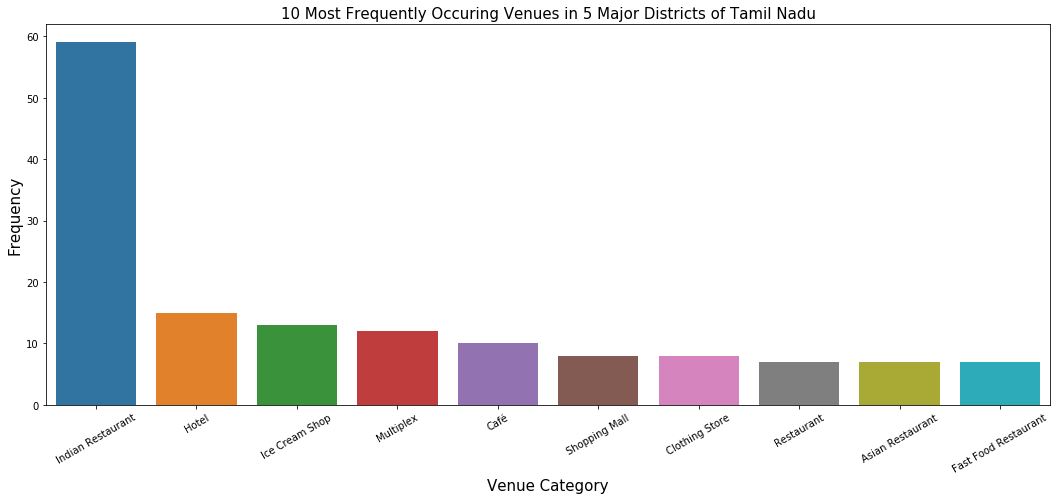

In [49]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="VenueCategory", y="Frequency", data=TN_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Tamil Nadu', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()


### Indian Restaurants are the most frequently visited ones in Tamil Nadu.
### A look at a typical south Indian Thali
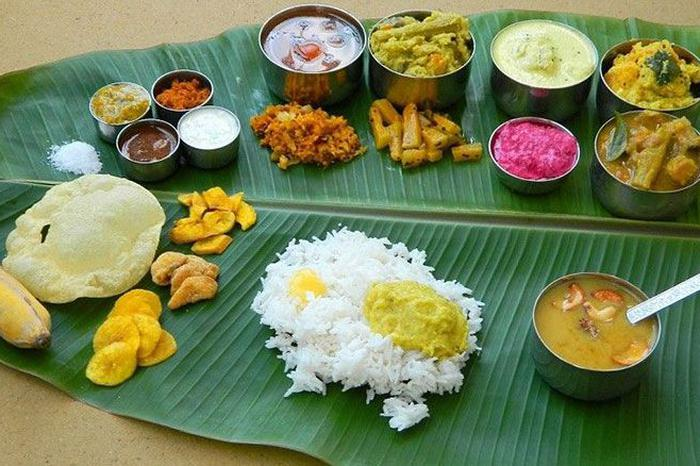

### Using one hot encoding to explore the venues more

In [50]:
TN_5_Dist_Venues_onehot = pd.get_dummies(TN_5_Dist_Venues[['VenueCategory']], prefix="", prefix_sep="")

### add district column back to dataframe
TN_5_Dist_Venues_onehot['District'] = TN_5_Dist_Venues['District'] 
### move district column to the first column
fixed_columns = [TN_5_Dist_Venues_onehot.columns[-1]] + list(TN_5_Dist_Venues_onehot.columns[:-1])
TN_5_Dist_Venues_onehot = TN_5_Dist_Venues_onehot[fixed_columns]
TN_5_Dist_Venues_onehot.tail(7)

,District,Accessories Store,African Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Board Shop,...,Soccer Stadium,Southern / Soul Food Restaurant,Sports Club,Stadium,Steakhouse,Theater,Train Station,Vegetarian / Vegan Restaurant,Video Store,Women's Store
262,Madurai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,Madurai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,Madurai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,Madurai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,Madurai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,Madurai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,Madurai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
TN_5_Dist_Venues_Grouped = TN_5_Dist_Venues_onehot.groupby('District').mean().reset_index()
TN_5_Dist_Venues_Grouped.index = np.arange(1, len(TN_5_Dist_Venues_Grouped)+1)
TN_5_Dist_Venues_Grouped

,District,Accessories Store,African Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Board Shop,...,Soccer Stadium,Southern / Soul Food Restaurant,Sports Club,Stadium,Steakhouse,Theater,Train Station,Vegetarian / Vegan Restaurant,Video Store,Women's Store
1,Chennai,0.00,0.012346,0.00,0.012346,0.00,0.000000,0.024691,0.037037,0.00,...,0.012346,0.00000,0.012346,0.00,0.00,0.012346,0.012346,0.024691,0.012346,0.00
2,Coimbatore,0.02,0.000000,0.00,0.060000,0.01,0.010000,0.010000,0.000000,0.01,...,0.000000,0.00000,0.000000,0.01,0.01,0.000000,0.000000,0.040000,0.000000,0.02
3,Madurai,0.00,0.000000,0.00,0.000000,0.00,0.038462,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.019231,0.000000,0.000000,0.00
4,Salem,0.00,0.000000,0.00,0.000000,0.00,0.093750,0.000000,0.000000,0.00,...,0.000000,0.03125,0.000000,0.00,0.00,0.000000,0.031250,0.000000,0.000000,0.00
5,Tiruvallur,0.00,0.000000,0.25,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.500000,0.000000,0.000000,0.00


In [52]:
num_top_venues = 5

for places in TN_5_Dist_Venues_Grouped['District']:
    print("***********"+places+"*************")
    temp = TN_5_Dist_Venues_Grouped[TN_5_Dist_Venues_Grouped['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

***********Chennai*************
                  Venue  Freq
0     Indian Restaurant  0.22
1  Fast Food Restaurant  0.04
2                 Beach  0.04
3    Italian Restaurant  0.04
4        Ice Cream Shop  0.04


***********Coimbatore*************
               Venue  Freq
0  Indian Restaurant  0.16
1     Clothing Store  0.07
2   Asian Restaurant  0.06
3     Ice Cream Shop  0.06
4          Multiplex  0.05


***********Madurai*************
               Venue  Freq
0  Indian Restaurant  0.27
1              Hotel  0.12
2      Movie Theater  0.08
3      Shopping Mall  0.06
4               Café  0.06


***********Salem*************
               Venue  Freq
0  Indian Restaurant  0.31
1             Bakery  0.09
2          Multiplex  0.06
3     Ice Cream Shop  0.06
4              Hotel  0.06


***********Tiruvallur*************
               Venue  Freq
0      Train Station  0.50
1  Indian Restaurant  0.25
2             Arcade  0.25
3      Memorial Site  0.00
4          Multiplex  0.00


### Selecting the Top 10 Venues for Each District and creating a  DataFrame.

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = TN_5_Dist_Venues_Grouped['District']

for ind in np.arange(TN_5_Dist_Venues_Grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(TN_5_Dist_Venues_Grouped.iloc[ind, :], num_top_venues)
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chennai,Indian Restaurant,Italian Restaurant,Ice Cream Shop,Fast Food Restaurant,Hotel,Multiplex,Beach,Juice Bar,Café,Vegetarian / Vegan Restaurant
2,Coimbatore,Indian Restaurant,Clothing Store,Asian Restaurant,Ice Cream Shop,Multiplex,Vegetarian / Vegan Restaurant,Café,Hotel,Dessert Shop,Pizza Place
3,Madurai,Indian Restaurant,Hotel,Movie Theater,Café,Shopping Mall,Bakery,Multiplex,Cupcake Shop,Ice Cream Shop,Department Store
4,Salem,Indian Restaurant,Bakery,Multiplex,Hotel,Ice Cream Shop,Café,Pizza Place,Department Store,Chinese Restaurant,Dessert Shop
5,Tiruvallur,Train Station,Arcade,Indian Restaurant,Women's Store,Fast Food Restaurant,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop


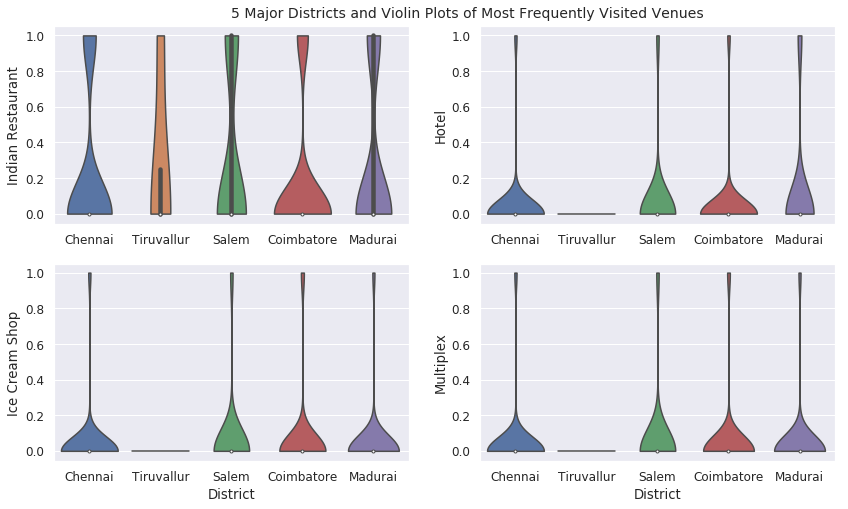

In [54]:
fig = plt.figure(figsize=(14,8))

sns.set(font_scale=1.1)
ax = plt.subplot(2,2,1)
sns.violinplot(x="District", y="Indian Restaurant", data=TN_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
ax = plt.subplot(2,2,2)
sns.violinplot(x="District", y="Hotel", data=TN_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
plt.subplot(2,2,3)
sns.violinplot(x="District", y="Ice Cream Shop", data=TN_5_Dist_Venues_onehot, cut=0);
plt.subplot(2,2,4)
sns.violinplot(x="District", y="Multiplex", data=TN_5_Dist_Venues_onehot, cut=0);
#ax.title.set_text("5 Major Districts and Violin Plots of Most Frequently Visited Restaurants")
ax.text(-4.0, 1.1, '5 Major Districts and Violin Plots of Most Frequently Visited Venues', fontsize=14)
plt.savefig ("Violin_plots_Dist_Frequent_Venues.png", dpi=240)
plt.show()

[3, 5, 2, 2, 0]


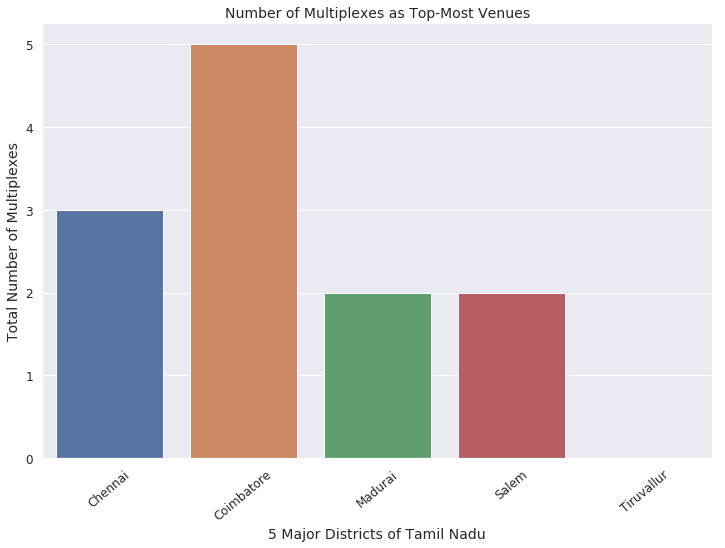

In [55]:
TN_5_Dist_Venues_multiplex = TN_5_Dist_Venues.groupby(['District'])['VenueCategory'].apply(lambda x: x[x.str.contains('Multiplex')].count())
TN_5_Dist_Venues_multiplex_df = TN_5_Dist_Venues_multiplex.to_frame().reset_index()
TN_5_Dist_Venues_multiplex_df.columns = ['District', 'Number of Multiplexes']
#Tokyo_5_Dist_Venues_restaurant.columns = ['District', 'Number of Restaurant']
#print (type(Tokyo_5_Dist_Venues_restaurant))
TN_5_Dist_Venues_multiplex_df.index = np.arange(1, len(TN_5_Dist_Venues_multiplex_df)+1)

#print ("shape of the dataframe: ", Tokyo_5_Dist_Venues_restaurant_df.shape)
#print (Tokyo_5_Dist_Venues_restaurant_df.head(5))
#print (type(Tokyo_5_Dist_Venues_restaurant_df[['Number of Restaurant']]))
list_rest_no = TN_5_Dist_Venues_multiplex_df['Number of Multiplexes'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='District', y='Number of Multiplexes', data=TN_5_Dist_Venues_multiplex_df)

bar.set_ylabel("Total Number of Multiplexes", fontsize=14)
bar.set_xlabel("5 Major Districts of Tamil Nadu", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Multiplexes as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

### Using K-Means Clustering for clustering the Tamil Nadu Districts (Neighborhoods)

In [56]:
kclusters = 3
TN_grouped_clustering = TN_5_Dist_Venues_Grouped.drop('District', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(TN_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])

Check the 5 Cluster labels : [2 2 1 1 0]


In [57]:
District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

TN_5_Dist_Coordinate_Cluster_merged = TN_df_selected_final

#merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

TN_5_Dist_Coordinate_Cluster_merged = TN_5_Dist_Coordinate_Cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='District')

TN_5_Dist_Coordinate_Cluster_merged.head()

,District,Population,Talukas,Dist_Latitude,Dist_Longitude,Area,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chennai,4646732.0,"Alandur, Ambattur, Aminjikarai, Ayanavaram, Eg...",13.080172,80.283833,426.00,2,Indian Restaurant,Italian Restaurant,Ice Cream Shop,Fast Food Restaurant,Hotel,Multiplex,Beach,Juice Bar,Café,Vegetarian / Vegan Restaurant
2,Tiruvallur,3728104.0,"Avadi, Gummidipoondi, Pallipattu, Ponneri, Poo...",13.139436,79.907304,3424.00,0,Train Station,Arcade,Indian Restaurant,Women's Store,Fast Food Restaurant,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop
3,Salem,3482056.0,"Attur, Idappadi, Gangavalli, Kadyampatti, Mett...",11.664300,78.146000,5205.00,1,Indian Restaurant,Bakery,Multiplex,Hotel,Ice Cream Shop,Café,Pizza Place,Department Store,Chinese Restaurant,Dessert Shop
4,Coimbatore,3458045.0,"Anaimalai, Annur, Coimbatore-North, Coimbatore...",11.001812,76.962843,NaN,2,Indian Restaurant,Clothing Store,Asian Restaurant,Ice Cream Shop,Multiplex,Vegetarian / Vegan Restaurant,Café,Hotel,Dessert Shop,Pizza Place
5,Madurai,3038252.0,"Madurai-North, Madurai-South, Madurai-West, Ma...",9.926115,78.114098,3741.73,1,Indian Restaurant,Hotel,Movie Theater,Café,Shopping Mall,Bakery,Multiplex,Cupcake Shop,Ice Cream Shop,Department Store


In [58]:
map_clusters = folium.Map(location=[TN_latitude, TN_longitude], )

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(TN_5_Dist_Coordinate_Cluster_merged['Dist_Latitude'], 
                                  TN_5_Dist_Coordinate_Cluster_merged['Dist_Longitude'], 
                                  TN_5_Dist_Coordinate_Cluster_merged['District'], 
                                  TN_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [59]:

# create map
map_multiplexes10 = folium.Map(location=[TN_latitude, TN_longitude], tiles='cartodbpositron', attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Chennai', 'Coimbatore', 'Tiruvallur', 'Salem', 'Madurai']

# add markers to the map
for lat, lon, poi, cluster in zip(TN_5_Dist_Coordinate_Cluster_merged['Dist_Latitude'], 
                                  TN_5_Dist_Coordinate_Cluster_merged['Dist_Longitude'], 
                                  TN_5_Dist_Coordinate_Cluster_merged['District'], 
                                  TN_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Districts.index(poi)]*0.6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_multiplexes10)
map_multiplexes10

### Exploring first Cluster

In [58]:
TN_Cluster1 = TN_5_Dist_Coordinate_Cluster_merged.loc[TN_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 0, 
                                    TN_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, TN_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(TN_Cluster1.shape[0]))
TN_Cluster1

No of Neighbourhood in Cluster Label 0: 1


,Dist_Latitude,Dist_Longitude,Area,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,13.139436,79.907304,3424.0,0,Indian Restaurant,Hotel,Train Station,Motorcycle Shop,Food,Dessert Shop,Diner,Donut Shop,Electronics Store,Fast Food Restaurant


### Exploring second Cluster

In [59]:
TN_Cluster2 = TN_5_Dist_Coordinate_Cluster_merged.loc[TN_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 1, 
                                    TN_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, TN_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(TN_Cluster2.shape[0]))
TN_Cluster2

No of Neighbourhood in Cluster Label 1: 2


,Dist_Latitude,Dist_Longitude,Area,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,11.664300,78.146000,5205.00,1,Indian Restaurant,Bakery,Hotel,Multiplex,Ice Cream Shop,Department Store,Fast Food Restaurant,Chinese Restaurant,Café,Outdoors & Recreation
5,9.926115,78.114098,3741.73,1,Indian Restaurant,Hotel,Movie Theater,Shopping Mall,Café,Bakery,Ice Cream Shop,Cupcake Shop,Multiplex,Train Station


### Exploring Third Cluster

In [60]:
TN_Cluster3 = TN_5_Dist_Coordinate_Cluster_merged.loc[TN_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 2, 
                                    TN_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, TN_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(TN_Cluster3.shape[0]))
TN_Cluster3

No of Neighbourhood in Cluster Label 2: 2


,Dist_Latitude,Dist_Longitude,Area,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,13.080172,80.283833,426.0,2,Indian Restaurant,Hotel,Multiplex,Italian Restaurant,Beach,Ice Cream Shop,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Department Store,Café
4,11.001812,76.962843,NaN,2,Indian Restaurant,Clothing Store,Asian Restaurant,Ice Cream Shop,Multiplex,Vegetarian / Vegan Restaurant,Café,Hotel,Pizza Place,Chinese Restaurant


# ***End of Project***